In [147]:
import pandas as pd
from seaborn import scatterplot, lineplot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import requests

In [148]:
def serialize_features(X):
    serial = X.flatten()
    return ",".join([str(i) for i in serial])

def deserialize_features_model1(X_serialized, delimiter=','):
    res = np.array([float(idx) for idx in X_serialized.split(delimiter)])
    return res.reshape(1,-1)

def deserialize_features_model2(X_serialized, n_features=5, deep=20, delimiter=','):
    res = np.array([float(idx) for idx in X_serialized.split(delimiter)])
    return res.reshape(1,deep,n_features)

**Model one**

In [149]:
df_raw_data_model_one = pd.read_csv('data/raw_data_test_model_one.csv').iloc[1:,2:]
df_X_model_one = pd.read_csv('data/X_test_model_one.csv')
df_y_model_one = pd.read_csv('data/y_test_model_one.csv')

In [8]:
df_X_model_one

,1.550480099999999917e+00,1.057376099999999930e+00,1.057528699999999988e+00,1.058054599999999956e+00,1.058654699999999949e+00,4.758062400000000025e+00,3.225827000000000222e+00,3.227336600000000111e+00,3.229617800000000205e+00,3.232182499999999958e+00,...,2.197424316406250000e+01,3.205696868896484375e+01,3.209178543090820312e+01,3.204138183593750000e+01,3.204423904418945312e+01,3.913782501220703125e+01,3.923263168334960938e+01,3.917541885375976562e+01,3.912194061279296875e+01,3.904919815063476562e+01
0,1.956658,1.075365,1.079731,1.079204,1.081131,6.191904,3.267657,3.282510,3.279970,3.286086,...,25.393084,30.258728,30.492798,30.417418,30.534182,34.373383,37.425835,37.651405,37.834183,37.878963
1,1.953445,1.065114,1.068722,1.069063,1.071031,6.179254,3.234966,3.246217,3.246947,3.253163,...,25.061066,30.494907,30.769789,30.715918,30.837019,34.718624,37.805176,38.267139,38.347214,38.150326
2,1.673755,1.076901,1.079723,1.081228,1.081994,5.153187,3.281329,3.290732,3.295289,3.298334,...,29.247707,29.698160,29.596653,29.836266,29.724728,30.690804,31.002041,30.935932,31.184330,30.779972
3,1.563987,1.069167,1.070185,1.070812,1.071306,4.785489,3.250850,3.256119,3.259167,3.264050,...,23.500174,30.795448,30.908312,30.855324,30.783081,36.226662,36.368675,36.844353,36.862236,36.874847
4,1.697902,1.089555,1.092491,1.093831,1.094616,5.234180,3.319143,3.328435,3.332902,3.335233,...,29.651451,30.323977,30.361492,30.369667,30.279278,37.102882,37.263870,37.341690,37.286499,37.359303
5,1.551860,1.060080,1.061130,1.061978,1.062527,4.763856,3.236128,3.240401,3.243830,3.245892,...,21.845690,32.199791,32.181175,32.189358,32.183651,38.569229,38.633129,38.604427,38.579742,38.509514
6,1.684844,1.075039,1.077748,1.079065,1.079690,5.195357,3.276470,3.285415,3.289785,3.291770,...,29.834707,30.629353,30.627155,30.584005,30.599955,37.045242,37.090046,37.075390,37.060307,37.018494
7,1.550169,1.059415,1.060272,1.060788,1.061322,4.753863,3.232279,3.236388,3.239053,3.241311,...,21.720539,31.552387,31.595383,31.611597,31.569719,34.114887,34.383034,34.254642,34.186272,34.234756
8,1.553741,1.065200,1.066369,1.067315,1.067877,4.762446,3.245906,3.250484,3.254114,3.256519,...,22.150122,30.747864,30.744057,30.735487,30.714148,32.248440,31.780743,31.723621,31.701719,31.690681
9,1.541386,1.051274,1.051867,1.052279,1.052521,4.730096,3.208806,3.211438,3.213545,3.214654,...,22.130196,32.154327,32.175060,32.149590,32.080593,38.842758,39.647152,39.560246,39.458691,39.528564


In [9]:
df_y_model_one

,1.000000000000000000e+00
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,0.0


**Call de l'api**

https://battery-hrfer72diq-ew.a.run.app/predict1?X_val_serialized=1.5689189%2C1.0731678%2C1.0741653%2C1.0748765%2C1.0754544%2C4.807014%2C3.2680535%2C3.2722847%2C3.2753634%2C3.2773905%2C1.286925029700654%2C0.8770892054362099%2C0.87771297876224%2C0.8780867457203779%2C0.8782994108162671%2C1.0710737%2C1.0725025%2C1.0736545%2C1.0745056%2C1.0751213%2C3.7352712%2C3.7260218%2C3.7281945%2C3.7301137%2C3.7315185%2C0.016299750655889%2C0.016181953251361%2C0.016139417886734%2C0.016102511435747%2C0.016089925542473%2C32.313289642333984%2C33.1047477722168%2C33.09000015258789%2C33.10844802856445%2C33.06830596923828%2C22.9891357421875%2C31.17228889465332%2C31.190160751342773%2C31.11138343811035%2C31.022550582885746%2C37.29108810424805%2C35.189266204833984%2C35.18856430053711%2C35.26056289672852%2C35.24817657470703
API call error 422
prediction: 1
real: 1


/home/nes/.pyenv/versions/3.8.12/envs/BatteryProject/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/nes/.pyenv/versions/3.8.12/envs/BatteryProject/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/nes/.pyenv/versions/3.8.12/envs/BatteryProject/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from ve

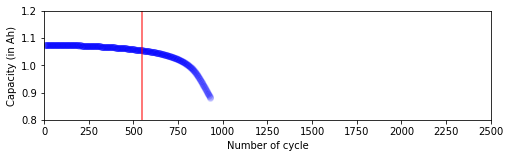

In [189]:
n = np.random.randint(0,df_raw_data_model_one.shape[0]-1)
X_sample = df_X_model_one.iloc[n,:].values
y_true = df_y_model_one.iloc[n].values[0]

### call d'API
params = {
    "X_val_serialized": serialize_features(X_sample),
}

server_exist = True
#url = "http://127.0.0.1:8000"
url = "https://battery-hrfer72diq-ew.a.run.app"
response = requests.get(url+"/predict1", params=params)
print(response.url)

if server_exist and response.status_code == 200:
    prediction = response.json()['predict']
    print("prediction (depuis l'api):", prediction)
    print('real:', int(y_true))
else:
    if server_exist:
        print("API call error", response.status_code)
    model = joblib.load('model_one.joblib')
    X_val = df_X_model_one.iloc[n,:].values.reshape(1, -1)
    prediction = model.predict(X_val)[0]
    print("prediction:", prediction)
    print('real:', int(y_true))
    
fig, axs = plt.subplots(figsize=(8,2))

#sns.scatterplot(y = df_raw_data_model_one.iloc[n,:].fillna(0), x =np.arange(0,3000,1), ax = axs, color = 'blue', alpha = 0.5)
#sns.lineplot(y = [0.8, 1.2], x = [550,550], color = 'red')

axs.scatter(np.arange(0,3000,1), df_raw_data_model_one.iloc[n,:].fillna(0), alpha = 0.05, color='blue')
plt.axvline(x = 550, color = 'red', alpha = 0.7)

axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.set_ylabel('Capacity (in Ah)')
axs.set_xlabel('Number of cycle')
axs.tick_params(axis='both', which='major', labelsize=10)


**Call de l'api**

In [167]:
n_features = 4
deep = 40

df_raw_data_model_three = pd.read_csv('data/raw_data_test_model_three.csv').iloc[:,1:]
X_test_model_three = np.genfromtxt('data/X_test_model_three.csv', delimiter = ',')
X_test_model_three = X_test_model_three.reshape(X_test_model_three.shape[0], deep,n_features)
X_test_scaled_model_three = np.genfromtxt('data/X_test_scaled_model_three.csv',delimiter = ',')
X_test_scaled_model_three = X_test_scaled_model_three.reshape(X_test_scaled_model_three.shape[0], deep,n_features)
y_test_model_three = pd.read_csv('data/y_test_model_three.csv')
#bc_test_model_three = pd.read_csv('data/bc_test_model_three.csv')


In [186]:
n = np.random.randint(0,X_test_scaled_model_three.shape[0])
X_sample = X_test_scaled_model_three[n,:,:]
y_true = int(y_test_model_three.iloc[n,0])

params = {
    "n_features": n_features,
    "deep": deep,
    "X_val_serialized": serialize_features(X_sample),
}

server_exist = True
url = "http://127.0.0.1:8000"
#url = "https://battery-hrfer72diq-ew.a.run.app"
response = requests.get(url+"/predict3", params=params)
print(response.url)

if server_exist and response.status_code == 200:
    prediction_2 = response.json()['predict']
    print("prediction (depuis l'api):", prediction_2)
    print('true:', int(y_true))
else:
    if server_exist:
        print("API call error", response.status_code)
    model = joblib.load('model_three.joblib')
    X_val = X_sample.reshape(1,deep,n_features)
    prediction_2 = int(model_2.predict(X_val)[0,0])
    print("prediction:", prediction_2)
    print('true:', int(y_true))
    


http://127.0.0.1:8000/predict3?n_features=4&deep=40&X_val_serialized=-0.36526427748934165%2C-0.3065500636264175%2C-0.5060972667903441%2C1.4858797385307518%2C-0.741519034718834%2C-0.4240353832491931%2C-0.7423019464763977%2C1.4858797385307518%2C-0.7344014131446119%2C-0.4175123578681643%2C-0.7374239606506265%2C1.4858797385307518%2C-0.7270499833455243%2C-0.41472812569539375%2C-0.7301906521210827%2C1.4858797385307518%2C-0.7210007909055072%2C-0.4088376688490899%2C-0.7249594647367941%2C1.4858797385307518%2C-0.7166538196945145%2C-0.4069476431823151%2C-0.7175140791708777%2C1.4858797385307518%2C-0.7081567214841314%2C-0.4023032459742015%2C-0.7113688090685715%2C1.4858797385307518%2C-0.6897977161013175%2C-0.3907903598608408%2C-0.7039529090488985%2C1.4858797385307518%2C-0.6566307492346178%2C-0.3807011691526621%2C-0.6689646503374339%2C1.4858797385307518%2C-0.6849856076862259%2C-0.37969474765448236%2C-0.6871682600304135%2C1.4858797385307518%2C-0.6717739897682601%2C-0.37240553251000635%2C-0.67416371771

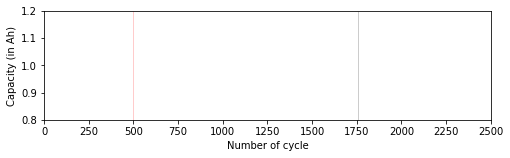

In [83]:
n = np.random.randint(0,df_raw_data_model_three.shape[0]-1)
y_real = int(y_test_model_three.iloc[n].values[0])
y_pred = 500

### call d'API
"""params = {
    "X_val_serialized": serialize_features(df_X_model_one.iloc[n,:].values),
}
url = "http://127.0.0.1:8000"
#url = "https://battery-hrfer72diq-ew.a.run.app"
response = requests.get(url+"/predict1", params=params)
#print(response.url)

if response.status_code == 200:
    prediction = response.json()['predict']
    print("prediction (depuis l'api):", prediction)
    print('real:', int(df_y_model_one.iloc[n].values[0]))
else:
    print("API call error", response.status_code)"""

    
fig, axs = plt.subplots(figsize=(8,2))

#sns.scatterplot(y = df_raw_data_model_three.iloc[n,:].fillna(0), x =np.arange(0,3000,1), ax = axs, color = 'blue', alpha = 0.5)
sns.lineplot(y = [0.8, 1.2], x = [y_pred,y_pred], color = 'red')
sns.lineplot(y = [0.8, 1.2], x = [y_real,y_real], color = 'black')
axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.set_ylabel('Capacity (in Ah)')
axs.set_xlabel('Number of cycle')
axs.tick_params(axis='both', which='major', labelsize=10)
